## Import Libraries

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Set plot style
sns.set(style="whitegrid")

In [15]:
import os

# confirm where Python is looking
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\HP\Desktop\fraud_detection_project\notebooks


## Load Dataset

In [16]:
df = pd.read_csv("../data/kenya_fraud_detection_dataset.csv")


 ## Inspect dataset

In [17]:
## check first 10 rows

df.head(10)

,Unnamed: 0,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,"time_of_day(morning, afternoon, evening, night)",is_foreign_number,is_sim_recently_swapped,has_multiple_accounts,datetime
0,0,TX100000,user_8270,Withdraw Cash,2646.35,Nakuru,Feature Phone,Telkom Kenya,individual,NaN,0,0,0,2024-06-16 21:45:13
1,1,TX100001,user_1860,Send Money,2844.69,Garissa,iOS,Safaricom,agent,NaN,0,0,0,2024-06-05 0:49:25
2,2,TX100002,user_6390,Deposit Cash,2384.46,Nyeri,Feature Phone,Telkom Kenya,agent,NaN,0,0,1,2024-06-13 15:54:02
3,3,TX100003,user_6191,Withdraw Cash,1846.01,Nairobi,iOS,Safaricom,individual,NaN,0,0,1,2024-06-10 1:05:49
4,4,TX100004,user_6734,Send Money,1017.60,Machakos,Feature Phone,Telkom Kenya,individual,NaN,0,0,0,2024-06-27 2:28:53
5,5,TX100005,user_7265,Withdraw Cash,1791.94,Meru,Feature Phone,Telkom Kenya,individual,NaN,0,0,1,2024-06-24 10:34:36
6,6,TX100006,user_1466,Lipa na M-Pesa,522.84,Meru,Feature Phone,Telkom Kenya,individual,NaN,0,0,1,2024-06-04 12:33:26
7,7,TX100007,user_5426,Buy Airtime,428.61,Nyeri,iOS,Safaricom,individual,NaN,0,0,0,2024-06-07 0:58:59
8,8,TX100008,user_6578,Withdraw Cash,1248.08,Nyeri,iOS,Safaricom,individual,NaN,0,0,0,2024-06-07 11:06:54
9,9,TX100009,user_9322,Lipa na M-Pesa,18797.20,Meru,Feature Phone,Telkom Kenya,individual,NaN,0,0,0,2024-06-24 11:53:58


In [18]:
## check size
df.shape

(10000, 14)

In [19]:
## check more information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       10000 non-null  int64  
 1   transaction_id                                   10000 non-null  object 
 2   user_id                                          10000 non-null  object 
 3   transaction_type                                 10000 non-null  object 
 4   amount                                           10000 non-null  float64
 5   location                                         10000 non-null  object 
 6   device_type                                      10000 non-null  object 
 7   network_provider                                 10000 non-null  object 
 8   user_type                                        10000 non-null  object 
 9   time_of_day(morning, afternoo

## Check for Missing Values

In [20]:
# Count missing values per column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0                                             0
transaction_id                                         0
user_id                                                0
transaction_type                                       0
amount                                                 0
location                                               0
device_type                                            0
network_provider                                       0
user_type                                              0
time_of_day(morning, afternoon, evening, night)    10000
is_foreign_number                                      0
is_sim_recently_swapped                                0
has_multiple_accounts                                  0
datetime                                               0
dtype: int64


## Check for Duplicates

In [21]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


## Drop irrelevant Columns

In [22]:
# Drop useless columns: Unnamed: 0 (index) and time_of_day (all missing)
df = df.drop(columns=['Unnamed: 0', 'time_of_day(morning, afternoon, evening, night)'], errors='ignore')

print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['transaction_id', 'user_id', 'transaction_type', 'amount', 'location', 'device_type', 'network_provider', 'user_type', 'is_foreign_number', 'is_sim_recently_swapped', 'has_multiple_accounts', 'datetime']


In [23]:
df.isna().sum()

transaction_id             0
user_id                    0
transaction_type           0
amount                     0
location                   0
device_type                0
network_provider           0
user_type                  0
is_foreign_number          0
is_sim_recently_swapped    0
has_multiple_accounts      0
datetime                   0
dtype: int64

## Check column unique values

#### Location Column

In [24]:
df["location"].unique()

array(['Nakuru', 'Garissa', 'Nyeri', 'Nairobi', 'Machakos', 'Meru',
       'Kisumu', 'Mombasa', 'Eldoret', 'Thika'], dtype=object)

#### Transaction Type

In [25]:
df["transaction_type"].unique()

array(['Withdraw Cash', 'Send Money', 'Deposit Cash', '  Send   Money',
       'Lipa na    M-Pesa', 'Buy Airtime', 'Lipa na M-Pesa', 'Pay Bill',
       'Pay    Bill', '  Buy    Airtime', '   Withdraw   Cash',
       ' Buy   Airtime  ', 'Lipa   na M-Pesa', 'Send   Money'],
      dtype=object)

#### Clean Transaction Type column

In [26]:
# Strip leading/trailing spaces
df["transaction_type"] = df["transaction_type"].str.strip()

# Replace multiple spaces with a single space
df["transaction_type"] = df["transaction_type"].str.replace(r"\s+", " ", regex=True)

# Standardize capitalization (optional)
df["transaction_type"] = df["transaction_type"].str.title()


# Check unique cleaned values
print(df["transaction_type"].unique())


['Withdraw Cash' 'Send Money' 'Deposit Cash' 'Lipa Na M-Pesa'
 'Buy Airtime' 'Pay Bill']


## Summary of numeric columns

In [27]:
print("\nNumeric summary:")
df.describe()



Numeric summary:


,amount,is_foreign_number,is_sim_recently_swapped,has_multiple_accounts
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3496.408626,0.032900,0.051800,0.096100
std,3507.288508,0.178384,0.221634,0.294743
min,0.030000,0.000000,0.000000,0.000000
25%,994.900000,0.000000,0.000000,0.000000
50%,2389.835000,0.000000,0.000000,0.000000
75%,4847.737500,0.000000,0.000000,0.000000
max,30221.300000,1.000000,1.000000,1.000000


## Summary of categorical columns

In [28]:
print("\nCategorical columns:")
df.select_dtypes(include='object').nunique()


Categorical columns:


transaction_id      10000
user_id              6002
transaction_type        6
location               10
device_type             3
network_provider        3
user_type               2
datetime             9979
dtype: int64

## Handle the Date Column


---



In [29]:
# Convert datetime column to proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


In [30]:
# Extract useful parts
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek   # Monday=0, Sunday=6


df[['datetime', 'date', 'hour', 'dayofweek']].head()

,datetime,date,hour,dayofweek
0,2024-06-16 21:45:13,2024-06-16,21,6
1,2024-06-05 00:49:25,2024-06-05,0,2
2,2024-06-13 15:54:02,2024-06-13,15,3
3,2024-06-10 01:05:49,2024-06-10,1,0
4,2024-06-27 02:28:53,2024-06-27,2,3


In [31]:
# Function to map hour → time of day
def map_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Create new column
df["time_of_day"] = df["hour"].apply(map_time_of_day)

# Check distribution
print(df["time_of_day"].value_counts())


time_of_day
Night        3318
Morning      2853
Afternoon    2088
Evening      1741
Name: count, dtype: int64


## Amount Distribution



In [32]:
# Summary statistics for transaction amounts
print(df['amount'].describe())

count    10000.000000
mean      3496.408626
std       3507.288508
min          0.030000
25%        994.900000
50%       2389.835000
75%       4847.737500
max      30221.300000
Name: amount, dtype: float64


In [33]:
# Check skewness (is it heavily skewed to the right?)
print("Skewness of amount:", df['amount'].skew())


Skewness of amount: 1.9537191623623722


#### Distribution of Amount

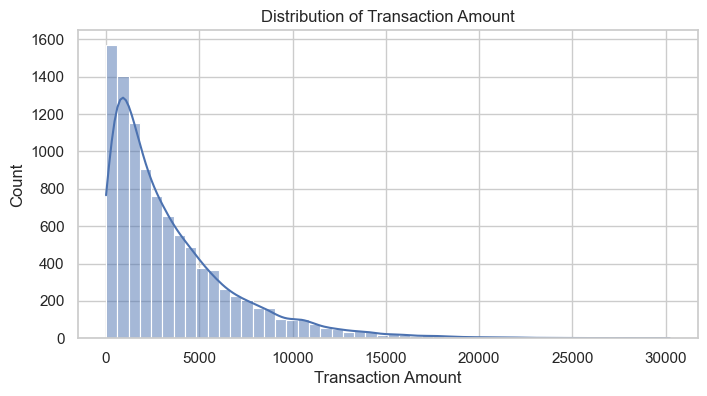

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(df['amount'], bins=50, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amount")
plt.show()

#### Using Log Amount

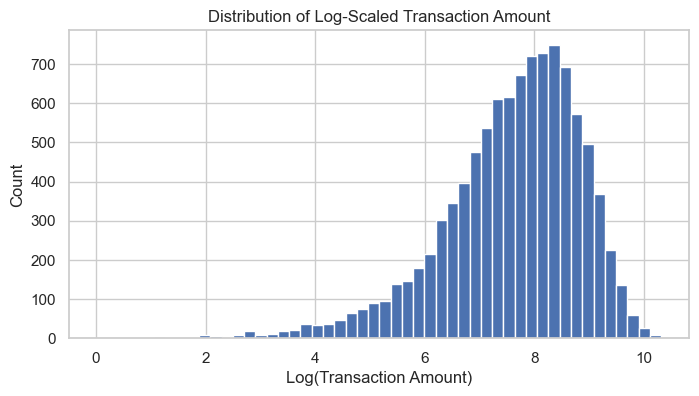

In [35]:
# Trying log scale (because fraud datasets usually have very skewed amounts)
plt.figure(figsize=(8,4))
np.log1p(df['amount']).hist(bins=50)   # log1p = log(1+x), safe for 0 values
plt.xlabel("Log(Transaction Amount)")
plt.ylabel("Count")
plt.title("Distribution of Log-Scaled Transaction Amount")
plt.show()

In [36]:
# Create log-transformed amount
df['log_amount'] = np.log1p(df['amount'])

df.head()

,transaction_id,user_id,transaction_type,amount,location,device_type,network_provider,user_type,is_foreign_number,is_sim_recently_swapped,has_multiple_accounts,datetime,date,hour,dayofweek,time_of_day,log_amount
0,TX100000,user_8270,Withdraw Cash,2646.35,Nakuru,Feature Phone,Telkom Kenya,individual,0,0,0,2024-06-16 21:45:13,2024-06-16,21,6,Night,7.881314
1,TX100001,user_1860,Send Money,2844.69,Garissa,iOS,Safaricom,agent,0,0,0,2024-06-05 00:49:25,2024-06-05,0,2,Night,7.953561
2,TX100002,user_6390,Deposit Cash,2384.46,Nyeri,Feature Phone,Telkom Kenya,agent,0,0,1,2024-06-13 15:54:02,2024-06-13,15,3,Afternoon,7.777147
3,TX100003,user_6191,Withdraw Cash,1846.01,Nairobi,iOS,Safaricom,individual,0,0,1,2024-06-10 01:05:49,2024-06-10,1,0,Night,7.521323
4,TX100004,user_6734,Send Money,1017.60,Machakos,Feature Phone,Telkom Kenya,individual,0,0,0,2024-06-27 02:28:53,2024-06-27,2,3,Night,6.926184


#### Comparison between Amount and log Amount with **Violin Plot**

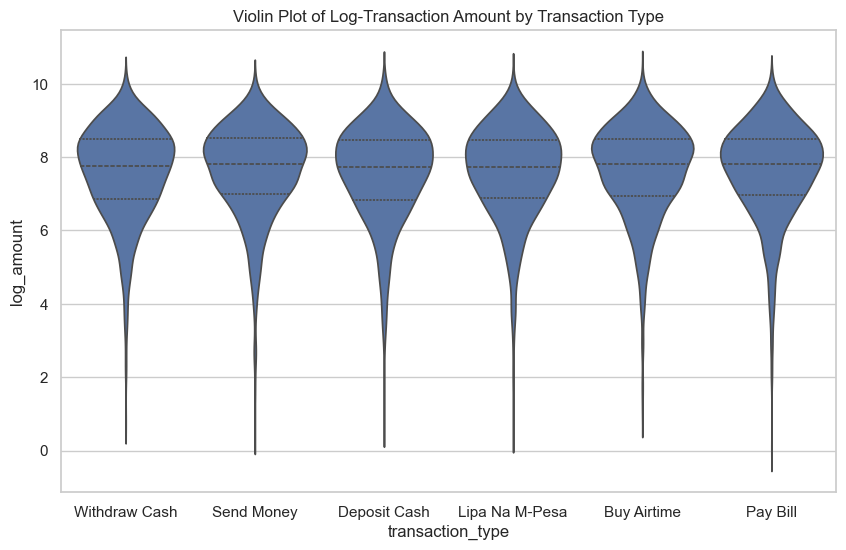

In [37]:
# Violin plot (transaction type vs log_amount)
plt.figure(figsize=(10,6))
sns.violinplot(x='transaction_type', y='log_amount', data=df, inner='quartile')
plt.title("Violin Plot of Log-Transaction Amount by Transaction Type")
plt.show()

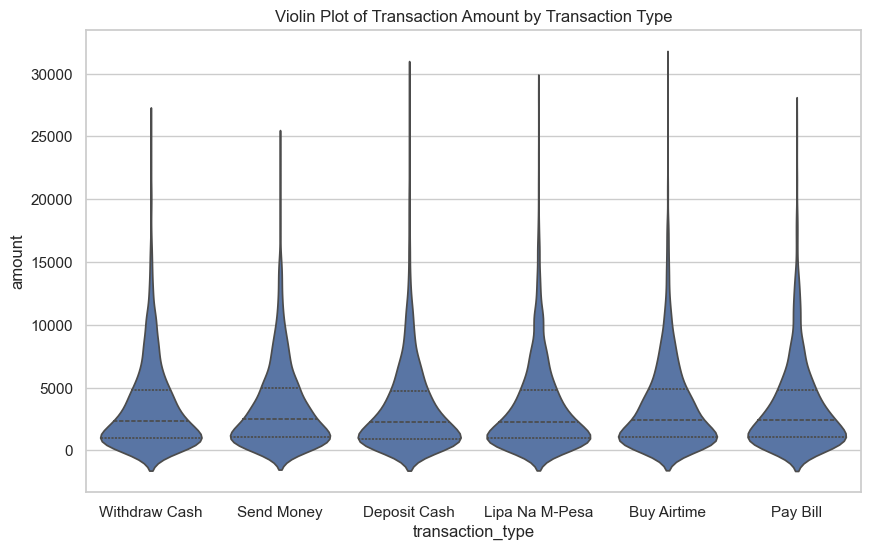

In [38]:
# Violin plot (transaction type vs amount)
plt.figure(figsize=(10,6))
sns.violinplot(x='transaction_type', y='amount', data=df, inner='quartile')
plt.title("Violin Plot of Transaction Amount by Transaction Type")
plt.show()

#### Using **Boxplot** to understand Outliners better

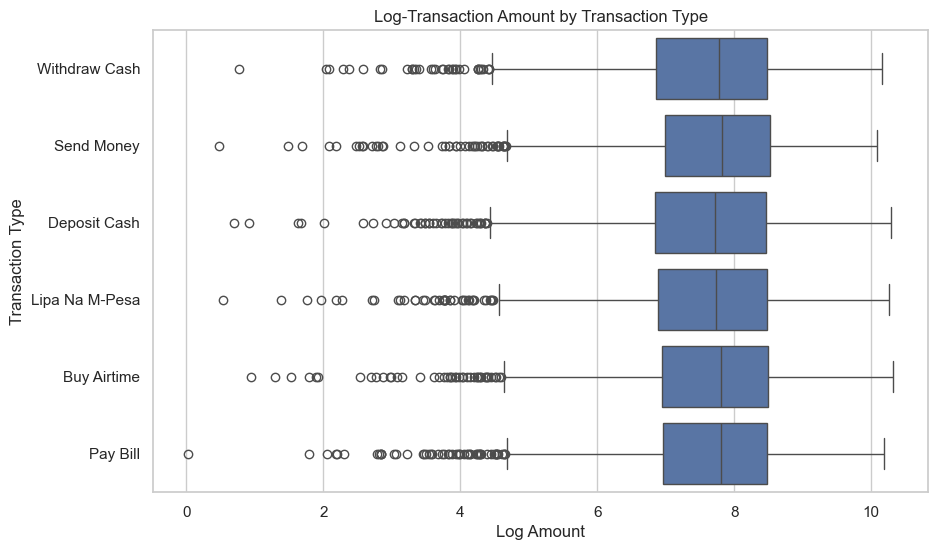

In [39]:
# 1. Transaction Type vs Log-Amount
plt.figure(figsize=(10,6))
sns.boxplot(x='log_amount', y='transaction_type', data=df)
plt.title("Log-Transaction Amount by Transaction Type")
plt.xlabel("Log Amount")
plt.ylabel("Transaction Type")
plt.show()




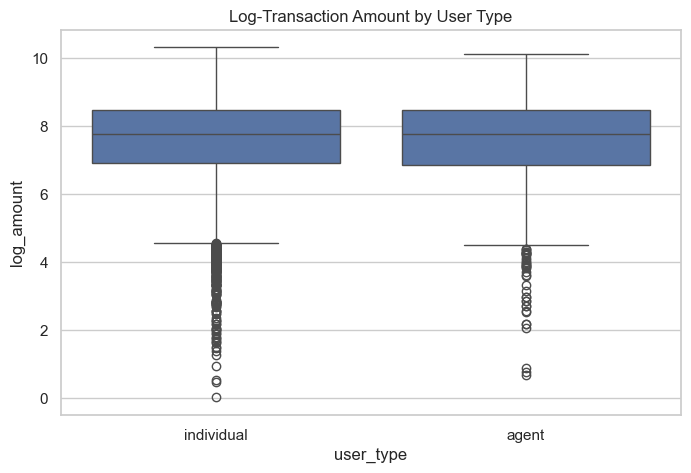

In [40]:
# 2. User Type vs Log-Amount
plt.figure(figsize=(8,5))
sns.boxplot(x='user_type', y='log_amount', data=df)
plt.title("Log-Transaction Amount by User Type")
plt.show()

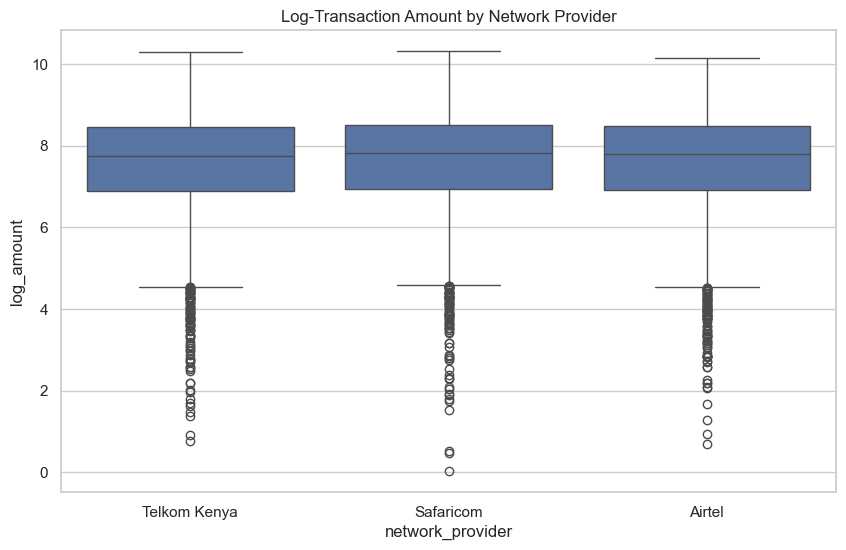

In [41]:
# 3. Network Provider vs Log-Amount
plt.figure(figsize=(10,6))
sns.boxplot(x='network_provider', y='log_amount', data=df)
plt.title("Log-Transaction Amount by Network Provider")
plt.show()


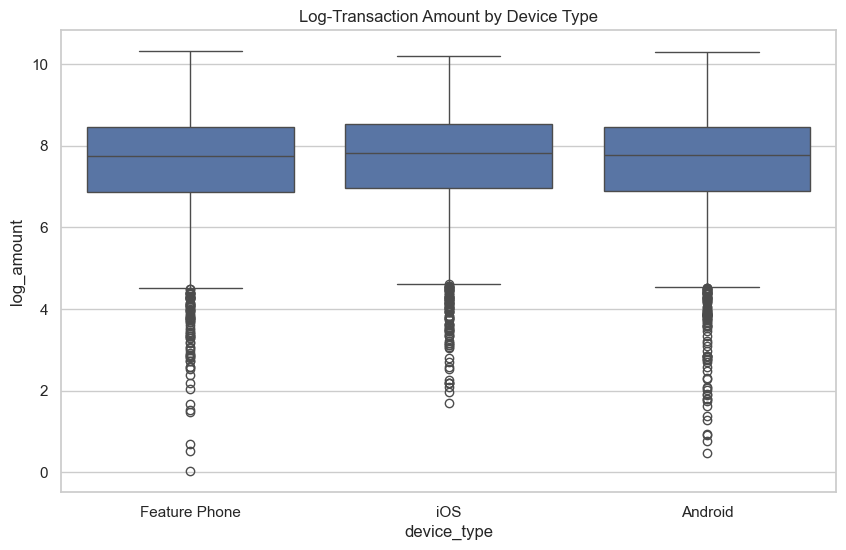

In [42]:
# 4. Device Type vs Log-Amount
plt.figure(figsize=(10,6))
sns.boxplot(x='device_type', y='log_amount', data=df)
plt.title("Log-Transaction Amount by Device Type")
plt.show()

## Understanding Transaction Trends: part of the day and days of the week

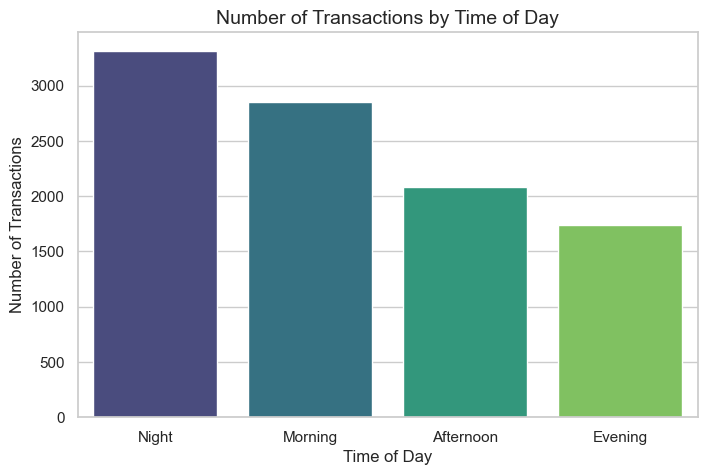

In [43]:
# Transactions per Time of Day
plt.figure(figsize=(8,5))
sns.countplot(
    x="time_of_day",
    data=df,
    palette="viridis",
    order=["Night", "Morning", "Afternoon", "Evening"]  # keep logical order
)
plt.title("Number of Transactions by Time of Day", fontsize=14)
plt.xlabel("Time of Day")
plt.ylabel("Number of Transactions")
plt.show()


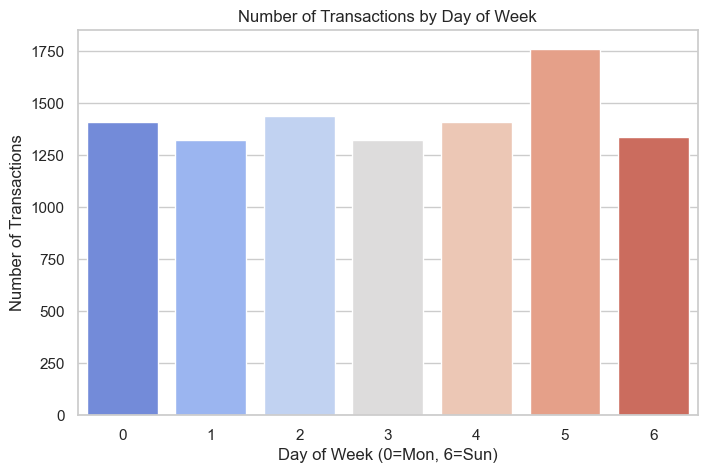

In [44]:
# Transactions per day of the week
plt.figure(figsize=(8,5))
sns.countplot(x="dayofweek", data=df, palette="coolwarm")
plt.title("Number of Transactions by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Number of Transactions")
plt.show()


#### checking Location counts

In [45]:
df["location"].value_counts()

location
Garissa     1056
Meru        1052
Eldoret     1039
Nyeri       1028
Thika       1025
Machakos     984
Mombasa      972
Nakuru       964
Nairobi      951
Kisumu       929
Name: count, dtype: int64

## Plotting the relationship between amount and Location

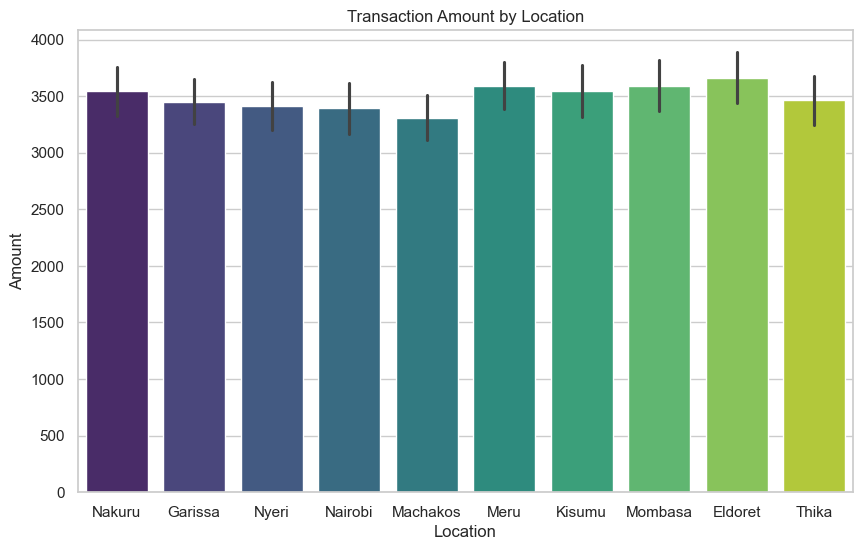

In [46]:
#Transaction Amount By Locations

plt.figure(figsize=(10,6))
sns.barplot(x='location', y='amount', data=df, palette="viridis")
plt.title("Transaction Amount by Location")
plt.xlabel("Location")
plt.ylabel("Amount")
plt.show()

## Correlation Matrix with Heatmap

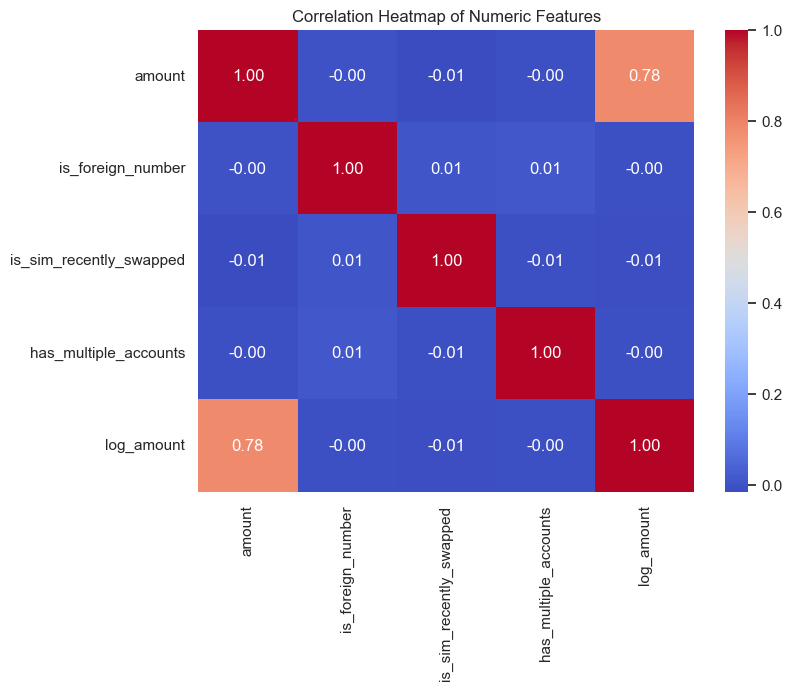

In [47]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=["int64", "float64"])

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [48]:
df.to_csv('../data/cleaned_Kenya_Fraud_data.csv', index=False)